## USC ID: 9907399097 Name: Subhiksha Rani

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.color import rgb2grey
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

__2. (Deep) CNNs for Image Colorization__

__(b) From the train and test dataset, extract the class birds.__

In [ ]:
files = ['data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']
data = []
for item in files:
    with open(item, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    features = dict_[b'data'].reshape((len(dict_[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = dict_[b'labels']
    unpickle = (features,labels)
    for i in range(len(unpickle[0])):
        if unpickle[1][i] == 2:
            data.append(unpickle[0][i])

In [11]:
np.array(data).shape

(6000, 32, 32, 3)

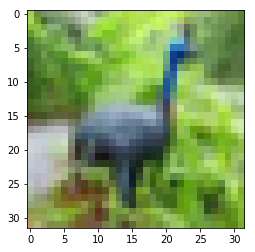

In [12]:
plt.imshow(data[0])

__(c) Selection of pixels__

In [13]:
pixel_list = np.reshape(data, (6144000, 3))
print(pixel_list)

[[164 206  84]
 [105 140  61]
 [118 148 101]
 ...
 [156 179  95]
 [158 180  98]
 [157 179  98]]


__(d) k-means clustering on the P vectors using k = 4__

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pixel_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.cluster_centers_

array([[156.28320314, 155.63277578, 135.73957785],
       [108.81658416, 108.46800139,  82.58454891],
       [206.79393787, 212.02874332, 211.67152158],
       [ 48.81967438,  49.80133893,  38.40303001]])

In [ ]:
lab = kmeans.predict(pixel_list)

__(e) Original to Grayscale__

In [ ]:
npl = []
Y = []
for ppp in range(len(pixel_list)):
    npl.append([int(op) for op in kmeans.cluster_centers_[lab[ppp]]])
    if lab[ppp] == 0:
        Y.append([1, 0, 0, 0])
    elif lab[ppp] == 1:
        Y.append([0, 1, 0, 0])
    elif lab[ppp] == 2:
        Y.append([0, 0, 1, 0])
    elif lab[ppp] == 3:
        Y.append([0, 0, 0, 1])

In [18]:
print("Shape of npl: ",np.shape(npl))
print("Shape of Y: ",np.shape(Y))

Shape of npl:  (6144000, 3)
Shape of Y:  (6144000, 4)


In [ ]:
npl = np.reshape(npl, (6000, 32, 32, 3))
Y = np.reshape(Y, (6000, 32, 32, 4))

In [ ]:
X = []
pixel_list = np.reshape(pixel_list, (6000, 32, 32, 3))
for i in range(len(pixel_list)):
    X.append(rgb2grey(pixel_list[i]).tolist())

In [ ]:
X = np.reshape(X, (6000, 32, 32, 1))

__(f) Deep Convolutional Neural Network.__

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(4, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

In [27]:
Y.shape

(6000, 32, 32, 4)

In [29]:
network = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

Train on 5400 samples, validate on 600 samples
Epoch 1/20
 - 2s - loss: 0.8433 - acc: 0.7128 - val_loss: 0.8026 - val_acc: 0.7208
Epoch 2/20
 - 2s - loss: 0.7774 - acc: 0.7242 - val_loss: 0.7565 - val_acc: 0.7165
Epoch 3/20
 - 2s - loss: 0.7259 - acc: 0.7322 - val_loss: 0.7038 - val_acc: 0.7364
Epoch 4/20
 - 2s - loss: 0.6895 - acc: 0.7356 - val_loss: 0.6700 - val_acc: 0.7340
Epoch 5/20
 - 2s - loss: 0.6563 - acc: 0.7404 - val_loss: 0.6412 - val_acc: 0.7450
Epoch 6/20
 - 2s - loss: 0.6358 - acc: 0.7408 - val_loss: 0.6166 - val_acc: 0.7448
Epoch 7/20
 - 2s - loss: 0.6150 - acc: 0.7421 - val_loss: 0.6206 - val_acc: 0.7218
Epoch 8/20
 - 2s - loss: 0.5951 - acc: 0.7451 - val_loss: 0.5807 - val_acc: 0.7479
Epoch 9/20
 - 2s - loss: 0.5750 - acc: 0.7489 - val_loss: 0.6060 - val_acc: 0.7083
Epoch 10/20
 - 2s - loss: 0.5649 - acc: 0.7468 - val_loss: 0.5714 - val_acc: 0.7258
Epoch 11/20
 - 2s - loss: 0.5519 - acc: 0.7477 - val_loss: 0.5429 - val_acc: 0.7456
Epoch 12/20
 - 2s - loss: 0.5386 - acc

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(614400, 4)
output_images = []
for p in range(len(y_pred)):
    output_images.append([int(op) for op in kmeans.cluster_centers_[np.argmax(y_pred[p])]])
y_test_reshaped = y_test.reshape(614400, 4)
y_test_k_color = []
for p in range(len(y_test_reshaped)):
    y_test_k_color.append([int(op) for op in kmeans.cluster_centers_[np.argmax(y_test_reshaped[p])]])
output_images = np.reshape(output_images, (600, 32, 32, 3))
y_test_k_color = np.reshape(y_test_k_color, (600, 32, 32, 3))

Comparing the artificially colored versions of the first 10 images in the test set with the original images:


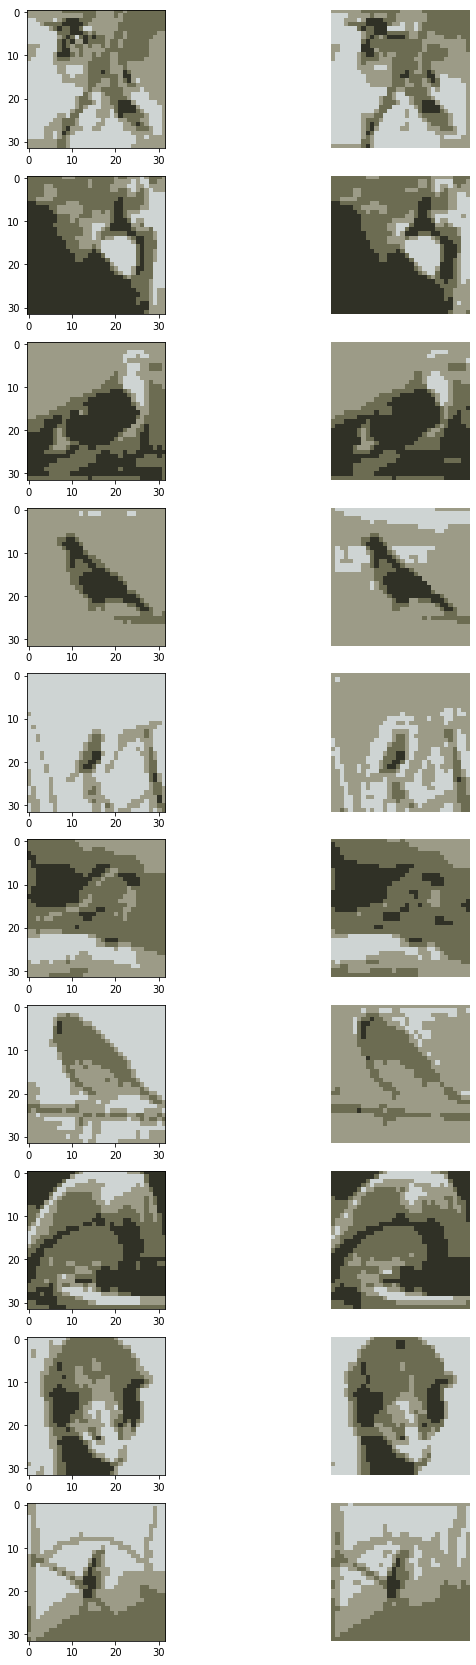

In [31]:
print("Comparing the artificially colored versions of the first 10 images in the test set with the original images:")
plt.figure(figsize=(10, 30))
subplotcount = 1
for i in range(0,10):
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(y_test_k_color[i])
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(output_images[i])
    plt.axis('off')
plt.show()

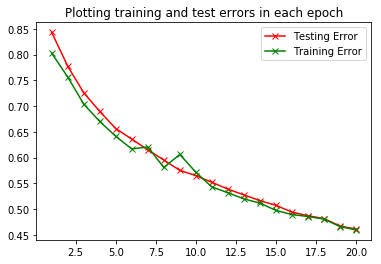

In [32]:
no_of_epochs = [int(i) for i in range(1, 21)]
plt.plot(no_of_epochs, network.history['loss'], marker = "x", color="r", label = "Testing Error")
plt.plot(no_of_epochs, network.history['val_loss'], marker = "x", color = "g", label = "Training Error")
plt.title("Plotting training and test errors in each epoch")
plt.legend()